In [1]:
import numpy as np
import os
import sys

# Get the absolute path of the parent directory of the current file (which is 'test')
# current_dir = os.getcwd()
# model_path = os.path.join(current_dir, '..', 'model')
# sys.path.append(model_path)
sys.path.append('..')

from model.Force import HullForce, ControlForce, TowingForce
from model.RigidBody import RigidBody
from model.Simulation import Simulation, Simulation_Result

In [2]:
# Set parameters
m = 0.877 # kg
Vol = 733159.45810955 * 10 ** (-9) #m3
Iyy = 6610.17475482 * 10 ** (-6) #kgm2
hull_surface_area = 0.1 #m2

r_xi = -111.76 * 10 ** (-3)
r_zi = 0.722 * 10 ** (-3)

r_xh = 0
r_zh = 0

r_xb = 0
r_zb = 0

r_xt = 42.9 * 10 ** (-3)
r_zt = -35.18 * 10 ** (-3)

rho = 1000

# Aero foil parameters
AR = 2.61 #aspect ratio
area = 0.2 #Surface area
C_L_a = 1 / 5
C_D_0 = 0.02



In [3]:
rigidbody = RigidBody(m, Vol, Iyy, np.array([r_xb, r_zb]))
towForce = TowingForce(np.array([r_xt,r_zt]),10,np.deg2rad(30))
controlForce = ControlForce(np.array([r_xi,r_zi]),np.deg2rad(-5),AR,area,C_L_a,C_D_0)
hullForce = HullForce(hull_surface_area,np.array([r_xh,r_zh]))

sim = Simulation(rigidbody,towForce,hullForce,[controlForce])



In [4]:
pitch_angle = -6
initial_state=np.array([0, 0, 0, 2, 0, 0, 0, 0, 0])
sim.initialize_system(initial_state)
# Solve forces
sim.solve_forces(0)

# Calculate sum of forces/moments
total_force_x, total_force_z = sim.rigidbody.sum_forces(pitch_angle) 
total_moment_y = sim.rigidbody.sum_moments(pitch_angle)

print(total_force_x)
print(total_force_z)
print(total_moment_y)

-268.1015206499935
31.59876512040063
8.952059728301544


In [5]:
print(controlForce.magnitude)

[104.58898872 -82.91972406]


In [6]:
print(hullForce.magnitude)

[180.   0.]


In [7]:
# results = sim.solve_equilibrium_state_fsolve_fixed_delta_i(2, 5)
# results = sim.solve_equilibrium_state_fsolve_fixed_pitch(5, -6)


In [14]:
#Find equilibrium by minimizing 3D vector of Forces and moment
results = sim.solve_equilibrium_state_sqrt(2)

#Solve forward euler
initial_state = np.array([0, 0, results.x[0], 2, 0, 0, 0, 0, 0]) #Set pitch angle to equilibrium value
sim.sim = sim.simulate_forward_euler(1000,0.01,initial_state)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     6.99            degrees   
Delta_t         17.02           degrees   
Towing Force    287.77          N         
Delta_i         -4.26           degrees   
----------------------
Fx constraint   -0.00           N         
Fz constraint   -0.00           N         
My constraint   0.00            Nm        
Objective Function Value: 1.3419744267860442e-10
Optimization successful!
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150

c:\Users\njthi\OneDrive\Documents\GitHub\uav-modeling\2D_Modeling\test\..\model\Force.py:67: RuntimeWarning: overflow encountered in scalar power
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
c:\Users\njthi\OneDrive\Documents\GitHub\uav-modeling\2D_Modeling\test\..\model\Force.py:45: RuntimeWarning: overflow encountered in scalar power
  V = np.sqrt((u + q * r_z)**2 + (w - q * r_x)**2)
c:\Users\njthi\OneDrive\Documents\GitHub\uav-modeling\2D_Modeling\test\..\model\RigidBody.py:52: RuntimeWarning: invalid value encountered in scalar add
  total_force_x = -(self.mass * 9.81 - self.buoyancy) *  np.sin(theta) \
c:\Users\njthi\OneDrive\Documents\GitHub\uav-modeling\2D_Modeling\test\..\model\RigidBody.py:83: RuntimeWarning: invalid value encountered in scalar add
  +f.location[1] * (-f.magnitude[0] * np.cos(f.alpha_i) + f.magnitude[1] * np.sin(f.alpha_i))) \
c:\Users\njthi\OneDrive\Documents\GitHub\uav-modeling\2D_Modeling\test\..\model\RigidBody.py:87: RuntimeWarning: invalid value enc

606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855


In [9]:
#Find equilibrium by constraining forces/moment to zero and solve for minimum towing force
results = sim.solve_equilibrium_state_min_FT(2)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 293.7472273786522
            Iterations: 9
            Function evaluations: 45
            Gradient evaluations: 9
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.00           degrees   
Delta_t         10.83           degrees   
Towing Force    293.75          N         
Delta_i         -3.69           degrees   
----------------------
Fx constraint   -0.00           N         
Fz constraint   0.00            N         
My constraint   0.00            Nm        
Objective Function Value: 293.7472273786522
Optimization successful!


In [10]:
#Find equilibrium by minimizing Forces and moment individually using least squares
results = sim.solve_equilibrium_state_LS(2)

Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -4.21           degrees   
Delta_t         10.71           degrees   
Towing Force    293.81          N         
Delta_i         -3.68           degrees   
----------------------
Fx:             0.00           N         
Fz:             -0.00          N         
My:             0.00           Nm        
Residual Norm: 0.000000
Optimization successful!


Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -7.00           degrees   
Delta_t         9.11            degrees   
Towing Force    294.55          N         
Delta_i         -3.52           degrees   
----------------------
Fx:             -0.00          N         
Fz:             -0.00          N         
My:             0.00           Nm        
Residual Norm: 0.000011
Optimization successful!
Optimization Results:
----------------------
Parameter       Value           Units     
----------------------
Pitch Angle     -5.45           degrees   
Delta_t         10.01           degrees   
Towing Force    294.19          N         
Delta_i         -3.61           degrees   
----------------------
Fx:             0.00           N         
Fz:             -0.00          N         
My:             0.01           Nm        
Residual Norm: 0.000019
Optimization successful!
Optimization Results:
----------------

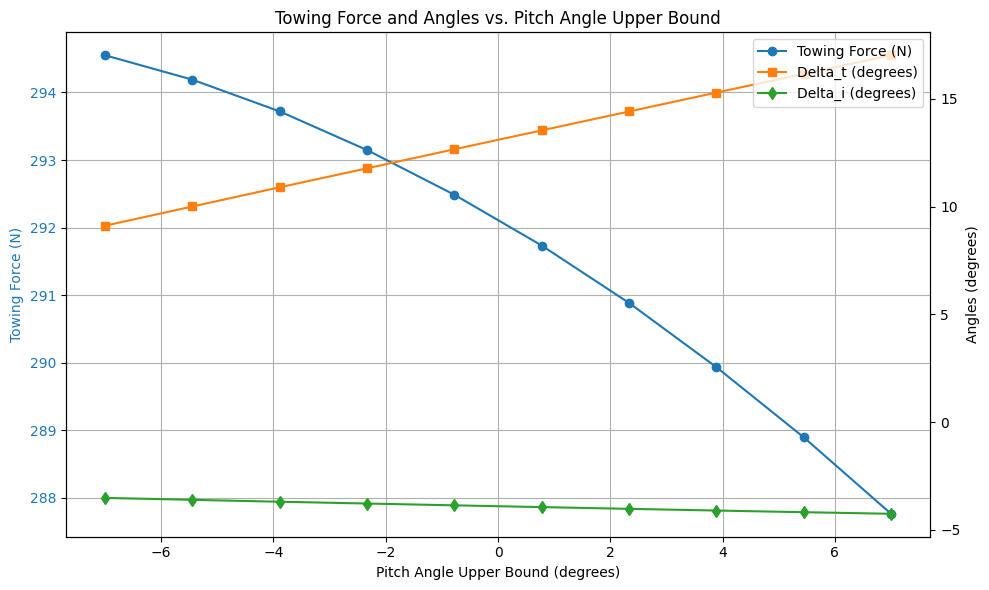

In [11]:
import matplotlib.pyplot as plt

# Generate pitch angle upper bounds (in radians)
pitch_angle_upper_bounds = np.linspace(-7, 7, 10)  # 10 points from -7 to 7 degrees

# Initialize arrays for results
towForces = np.zeros_like(pitch_angle_upper_bounds)
delta_ts = np.zeros_like(pitch_angle_upper_bounds)
delta_is = np.zeros_like(pitch_angle_upper_bounds)

# Run the simulation for each upper bound
for i, pitch_angle_ub in enumerate(pitch_angle_upper_bounds):
    sim.ub_pitch_angle = np.deg2rad(pitch_angle_ub)  # Convert to radians
    sim.lb_pitch_angle = np.deg2rad(pitch_angle_ub - 0.01)  # Lower bound in radians
    sim.bounds[0] = (sim.lb_pitch_angle, sim.ub_pitch_angle)
    result_LS = sim.solve_equilibrium_state_LS(2)  # Simulate and retrieve results

    # Store results
    delta_ts[i] = np.rad2deg(result_LS[1])  # Convert to degrees
    towForces[i] = result_LS[2]  # Force in N
    delta_is[i] = np.rad2deg(result_LS[3])  # Convert to degrees

# Create the figure and twin axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot towing force on the primary y-axis
ax1.plot(pitch_angle_upper_bounds, towForces, 'o-', color='tab:blue', label='Towing Force (N)')
ax1.set_xlabel('Pitch Angle Upper Bound (degrees)')
ax1.set_ylabel('Towing Force (N)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot delta_t and delta_i on the secondary y-axis
ax2.plot(pitch_angle_upper_bounds, delta_ts, 's-', color='tab:orange', label='Delta_t (degrees)')
ax2.plot(pitch_angle_upper_bounds, delta_is, 'd-', color='tab:green', label='Delta_i (degrees)')

ax2.set_ylabel('Angles (degrees)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

# Adjust layout and show the plot
plt.title('Towing Force and Angles vs. Pitch Angle Upper Bound')
plt.tight_layout()
plt.show()
